# Исследование данных и решение тренировочных задач

In [ ]:
import pandas as pd

# Загрузим датасет

In [ ]:
path = 'https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/driver_info.csv'
driver_info = pd.read_csv(path)

# Проанализируем данные, посмотрим на рандомную выборку, первые 5 элементов, общую информацию

In [ ]:
driver_info.head()

,age,user_rating,user_rides,user_time_accident,user_id,sex,first_ride_date
0,27,9.0,865,19.0,l17437965W,1,2019-4-2
1,46,7.9,2116,11.0,Z12362316j,0,2021-11-19
2,59,7.8,947,4.0,g11098715c,0,2021-1-15
3,37,7.0,18,4.0,U12618125q,0,2019-11-20
4,39,8.2,428,7.0,A14375829B,0,2019-7-23


In [ ]:
driver_info.sample(5)

,age,user_rating,user_rides,user_time_accident,user_id,sex,first_ride_date
11752,33,7.4,938,0.0,c79745922E,1,2018-12-15
3842,32,7.3,55,6.0,k18274855x,1,2019-12-2
2983,44,7.5,1061,7.0,F17960923g,0,2019-2-10
7683,18,8.1,976,17.0,F21091268m,1,2020-10-25
9834,30,8.0,996,4.0,L44839231f,0,2019-2-25


In [ ]:
driver_info.count()

age                   15153
user_rating           15153
user_rides            15153
user_time_accident    14182
user_id               15153
sex                   15153
first_ride_date       15153
dtype: int64

In [ ]:
driver_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15153 entries, 0 to 15152
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 15153 non-null  int64  
 1   user_rating         15153 non-null  float64
 2   user_rides          15153 non-null  int64  
 3   user_time_accident  14182 non-null  float64
 4   user_id             15153 non-null  object 
 5   sex                 15153 non-null  int64  
 6   first_ride_date     15153 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 828.8+ KB


Выводы: знаем, какие есть колонки, как примерно выглядят данные, какие типы данных в каждой колонке, сколько элементов в датасете

# Получим общие статистические данные

In [ ]:
driver_info.describe()

,age,user_rating,user_rides,user_time_accident,sex
count,15153.000000,15153.000000,15153.000000,14182.000000,15153.000000
mean,33.581073,8.109345,871.015442,10.129601,0.499967
std,9.919271,0.668246,573.512378,8.867482,0.500016
min,18.000000,5.800000,0.000000,0.000000,0.000000
25%,25.000000,7.700000,421.000000,4.000000,0.000000
50%,33.000000,8.100000,876.000000,9.000000,0.000000
75%,41.000000,8.600000,1145.000000,14.000000,1.000000
max,63.000000,10.000000,3316.000000,86.000000,1.000000


# Тренировочные задачи 1

Медиана возраста водителей (квантиль уровная 1/2)

In [ ]:
driver_info.age.quantile(q=1/2)

33.0

Минимальный рейтинг среди водителей

In [ ]:
driver_info.user_rating.min()

5.8

Самое частое число аварий

In [ ]:
driver_info.user_time_accident.value_counts()

6.0     843
3.0     794
8.0     777
4.0     760
11.0    752
       ... 
82.0      1
85.0      1
84.0      1
80.0      1
83.0      1
Name: user_time_accident, Length: 84, dtype: int64

Сколько строк в датасете?

In [ ]:
len(driver_info)

15153

Самый популярный пол?

In [ ]:
driver_info.sex.value_counts()

0    7577
1    7576
Name: sex, dtype: int64

# Тренировочная задача 2 (фильтрация)

Вопрос: Сколько водителей имеет количество инцидентов (user_time_accident) на полуинтервале (4.5, 9.0] и age < 40?

In [ ]:
path = 'https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/driver_info.csv'
driver_info = pd.read_csv(path)
driver_info.head(5)

,age,user_rating,user_rides,user_time_accident,user_id,sex,first_ride_date
0,27,9.0,865,19.0,l17437965W,1,2019-4-2
1,46,7.9,2116,11.0,Z12362316j,0,2021-11-19
2,59,7.8,947,4.0,g11098715c,0,2021-1-15
3,37,7.0,18,4.0,U12618125q,0,2019-11-20
4,39,8.2,428,7.0,A14375829B,0,2019-7-23


In [ ]:
driver_info.loc[(driver_info.user_time_accident>4.5)&(driver_info.user_time_accident<=9)&(driver_info.age<40)].nunique()

age                     22
user_rating             37
user_rides            1025
user_time_accident       5
user_id               2478
sex                      2
first_ride_date       1073
dtype: int64

# Тренировочная задача 3 (изменение, фильтрация)

Задача:
- Создайте столбец tripple_accident из столбца user_time_accident,  умноженного на 3.
- Создайте столбец rides_on_rating делением столбца user_rides на user_rating.
- Оставьте только те строки, у которых user_time_accident больше 25 (используем фильтрацию).
- Оставьте только те строки, у которых age выше среднего значения по полученной таблице в предыдущем пункте.


Сначала посмотрим на датасет

In [ ]:
driver_info = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/driver_info.csv')
driver_info.head(5)

,age,user_rating,user_rides,user_time_accident,user_id,sex,first_ride_date
0,27,9.0,865,19.0,l17437965W,1,2019-4-2
1,46,7.9,2116,11.0,Z12362316j,0,2021-11-19
2,59,7.8,947,4.0,g11098715c,0,2021-1-15
3,37,7.0,18,4.0,U12618125q,0,2019-11-20
4,39,8.2,428,7.0,A14375829B,0,2019-7-23


Видим, что работаем с тем же датасетом. Создадим объект-выборку из датасета и будем с ним работать.

In [ ]:
df = driver_info.sample(10)
df

,age,user_rating,user_rides,user_time_accident,user_id,sex,first_ride_date
10684,26,9.0,746,5.0,X10238033c,1,2020-8-25
13141,37,8.0,1006,13.0,S27814632f,1,2018-11-26
12851,25,8.6,1070,1.0,Q15701542o,1,2020-11-20
8379,42,9.3,480,NaN,V12020480X,0,2019-7-11
5449,30,8.0,596,4.0,j19416734b,1,2019-6-11
9659,36,7.9,2285,1.0,F26857064a,0,2022-3-28
13348,29,6.9,249,6.0,k19037890a,0,2020-4-17
2148,27,8.3,881,8.0,t59184072y,1,2020-10-3
5045,48,8.2,945,3.0,W20129245n,0,2019-3-10
10503,19,8.2,911,5.0,M62033220K,1,2020-10-10


In [ ]:
df['tripple_accident'] = df.user_time_accident*3
df

,age,user_rating,user_rides,user_time_accident,user_id,sex,first_ride_date,tripple_accident
10684,26,9.0,746,5.0,X10238033c,1,2020-8-25,15.0
13141,37,8.0,1006,13.0,S27814632f,1,2018-11-26,39.0
12851,25,8.6,1070,1.0,Q15701542o,1,2020-11-20,3.0
8379,42,9.3,480,NaN,V12020480X,0,2019-7-11,NaN
5449,30,8.0,596,4.0,j19416734b,1,2019-6-11,12.0
9659,36,7.9,2285,1.0,F26857064a,0,2022-3-28,3.0
13348,29,6.9,249,6.0,k19037890a,0,2020-4-17,18.0
2148,27,8.3,881,8.0,t59184072y,1,2020-10-3,24.0
5045,48,8.2,945,3.0,W20129245n,0,2019-3-10,9.0
10503,19,8.2,911,5.0,M62033220K,1,2020-10-10,15.0


In [ ]:
df['rides_on_rating']=df.user_rides/df.user_rating
df

,age,user_rating,user_rides,user_time_accident,user_id,sex,first_ride_date,tripple_accident,rides_on_rating
10684,26,9.0,746,5.0,X10238033c,1,2020-8-25,15.0,82.888889
13141,37,8.0,1006,13.0,S27814632f,1,2018-11-26,39.0,125.750000
12851,25,8.6,1070,1.0,Q15701542o,1,2020-11-20,3.0,124.418605
8379,42,9.3,480,NaN,V12020480X,0,2019-7-11,NaN,51.612903
5449,30,8.0,596,4.0,j19416734b,1,2019-6-11,12.0,74.500000
9659,36,7.9,2285,1.0,F26857064a,0,2022-3-28,3.0,289.240506
13348,29,6.9,249,6.0,k19037890a,0,2020-4-17,18.0,36.086957
2148,27,8.3,881,8.0,t59184072y,1,2020-10-3,24.0,106.144578
5045,48,8.2,945,3.0,W20129245n,0,2019-3-10,9.0,115.243902
10503,19,8.2,911,5.0,M62033220K,1,2020-10-10,15.0,111.097561


In [ ]:
df.query('user_time_accident > 25', inplace=True)

In [ ]:
age_mean = driver_info.age.mean()
df.query('age > @age_mean',inplace=True)

# Тренировочная задача 4 (индексы и столбцы)

Задача:
- Добавьте новую строку (с индексом new_index:(int / str) и значениями new_data:list).
- Удалите строки с индексами из списка del_index_list: list.
- Увеличьте значение destroy_degree на 1 в строке с индексом равным index. Переменная index содержит индекс строки ИЛИ число (индекс).
- Удалите столбец fix_date, т.к. не стоит сейчас думать о времени.
- Создайте новый столбец efficient, который равен destroy_degree деленный на work_duration.
- Возведите столбец work_duration в квадрат.
- Переименуйте столбец work_duration в work_duration_square.
- Удалите дубликаты по столбцу car_id.


В данной задаче предстоит работа с датасетом fix_info. Импортируем и посмотрим, что он из себя представляет

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/fix_info.csv')
df.head(10)

,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration
0,P17494612l,RJ,2020-6-20 2:14,reparking,8.0,49
1,N-1530212S,LM,2020-2-9 20:25,repair,10.0,48
2,B-1154399t,ND,2019-8-24 7:1,reparking,1.0,27
3,y13744087j,PG,2019-8-10 9:29,reparking,1.0,28
4,F12725233R,YC,2020-11-12 5:22,refuel_check,8.0,47
5,O41613818T,RW,2019-2-21 13:25,reparking,1.0,32
6,l-1139189J,PO,2020-3-2 19:11,reparking,1.0,28
7,d-2109686j,ML,2018-3-2 5:12,repair,7.4,39
8,u29695600e,QN,2020-2-2 20:10,reparking,10.0,64
9,U75286923j,KC,2019-9-2 6:32,reparking,1.0,24


Датасет содержит информацию о машине, инженере, который ее чинил, дате починки, виде ремонтных работ, "степени" поломки, продолжительности ремонта . Приступим к выполению задания.

Добавьте новую строку (с индексом new_index:(int / str) и значениями new_data:list)

In [ ]:
new_index = 5
new_data = ['O41613819T', 'RX', '2019-2-21 13:25', 'reparking', 5.0, 32]
df.iloc[new_index,:] = new_data
df.head(6)

,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration
0,P17494612l,RJ,2020-6-20 2:14,reparking,8.0,49
1,N-1530212S,LM,2020-2-9 20:25,repair,10.0,48
2,B-1154399t,ND,2019-8-24 7:1,reparking,1.0,27
3,y13744087j,PG,2019-8-10 9:29,reparking,1.0,28
4,F12725233R,YC,2020-11-12 5:22,refuel_check,8.0,47
5,O41613819T,RX,2019-2-21 13:25,reparking,5.0,32


Удалите строки с индексами из списка del_index_list : list)

In [ ]:
del_index = [1,4]
df.drop(del_index, axis=0, inplace=True)
df.head(6)

,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration
0,P17494612l,RJ,2020-6-20 2:14,reparking,8.0,49
2,B-1154399t,ND,2019-8-24 7:1,reparking,1.0,27
3,y13744087j,PG,2019-8-10 9:29,reparking,1.0,28
5,O41613819T,RX,2019-2-21 13:25,reparking,5.0,32
6,l-1139189J,PO,2020-3-2 19:11,reparking,1.0,28
7,d-2109686j,ML,2018-3-2 5:12,repair,7.4,39


Увеличьте значение destroy_degree в строке с индексом равным index на 1. Переменная index содержит индекс строки ИЛИ число (индекс)

In [ ]:
index=7
df.loc[index, 'destroy_degree'] +=1
df.head(6)


,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration
0,P17494612l,RJ,2020-6-20 2:14,reparking,8.0,49
2,B-1154399t,ND,2019-8-24 7:1,reparking,1.0,27
3,y13744087j,PG,2019-8-10 9:29,reparking,1.0,28
5,O41613819T,RX,2019-2-21 13:25,reparking,5.0,32
6,l-1139189J,PO,2020-3-2 19:11,reparking,1.0,28
7,d-2109686j,ML,2018-3-2 5:12,repair,8.4,39


Удалите столбец fix_date, ибо не время сейчас думать о времени

In [ ]:
df.drop('fix_date', axis=1, inplace=True)
df.head(7)

,car_id,worker_id,work_type,destroy_degree,work_duration
0,P17494612l,RJ,reparking,8.0,49
2,B-1154399t,ND,reparking,1.0,27
3,y13744087j,PG,reparking,1.0,28
5,O41613819T,RX,reparking,5.0,32
6,l-1139189J,PO,reparking,1.0,28
7,d-2109686j,ML,repair,8.4,39
8,u29695600e,QN,reparking,10.0,64


Создайте новый столбец efficient , который равен destroy_degree деленный на work_duration

In [ ]:
df['efficient'] = df.destroy_degree / df.work_duration
df.head(7)

,car_id,worker_id,work_type,destroy_degree,work_duration,efficient
0,P17494612l,RJ,reparking,8.0,49,0.163265
2,B-1154399t,ND,reparking,1.0,27,0.037037
3,y13744087j,PG,reparking,1.0,28,0.035714
5,O41613819T,RX,reparking,5.0,32,0.156250
6,l-1139189J,PO,reparking,1.0,28,0.035714
7,d-2109686j,ML,repair,8.4,39,0.215385
8,u29695600e,QN,reparking,10.0,64,0.156250


Возведите столбец work_duration в квадрат

In [ ]:
df.work_duration = df.work_duration**2
df.head(7)

,car_id,worker_id,work_type,destroy_degree,work_duration,efficient
0,P17494612l,RJ,reparking,8.0,2401,0.163265
2,B-1154399t,ND,reparking,1.0,729,0.037037
3,y13744087j,PG,reparking,1.0,784,0.035714
5,O41613819T,RX,reparking,5.0,1024,0.156250
6,l-1139189J,PO,reparking,1.0,784,0.035714
7,d-2109686j,ML,repair,8.4,1521,0.215385
8,u29695600e,QN,reparking,10.0,4096,0.156250


Переименуйте столбец work_duration в work_duration_square

In [ ]:
df.rename(columns = {'work_duration':'work_duration_square'}, inplace=True)
df.head(7)
df

,car_id,worker_id,work_type,destroy_degree,work_duration_square,efficient
0,P17494612l,RJ,reparking,8.0,2401,0.163265
2,B-1154399t,ND,reparking,1.0,729,0.037037
3,y13744087j,PG,reparking,1.0,784,0.035714
5,O41613819T,RX,reparking,5.0,1024,0.156250
6,l-1139189J,PO,reparking,1.0,784,0.035714
...,...,...,...,...,...,...
145995,j92079780S,NG,reparking,1.0,1296,0.027778
145996,N89944460U,WM,repair,2.6,169,0.200000
145997,f63189062N,NY,repair,5.0,196,0.357143
145998,j-1712772o,IP,repair,5.0,169,0.384615


Удалить дубликаты по столбцу car_id

In [ ]:
df.drop_duplicates(subset='car_id', inplace=True)
df.car_id.value_counts()

P17494612l    1
s48916749r    1
o-1428006H    1
P-1019884q    1
b-1924728p    1
             ..
v95100302y    1
S-8715402c    1
l13980749p    1
D-1518430R    1
O41613818T    1
Name: car_id, Length: 4251, dtype: int64

# Тренировочная задача 5 (сортировка и фильтрация)

Объект pd.DataFrame() помещен в переменную df со столбцами car_id, riders, car_type и некоторыми другими.

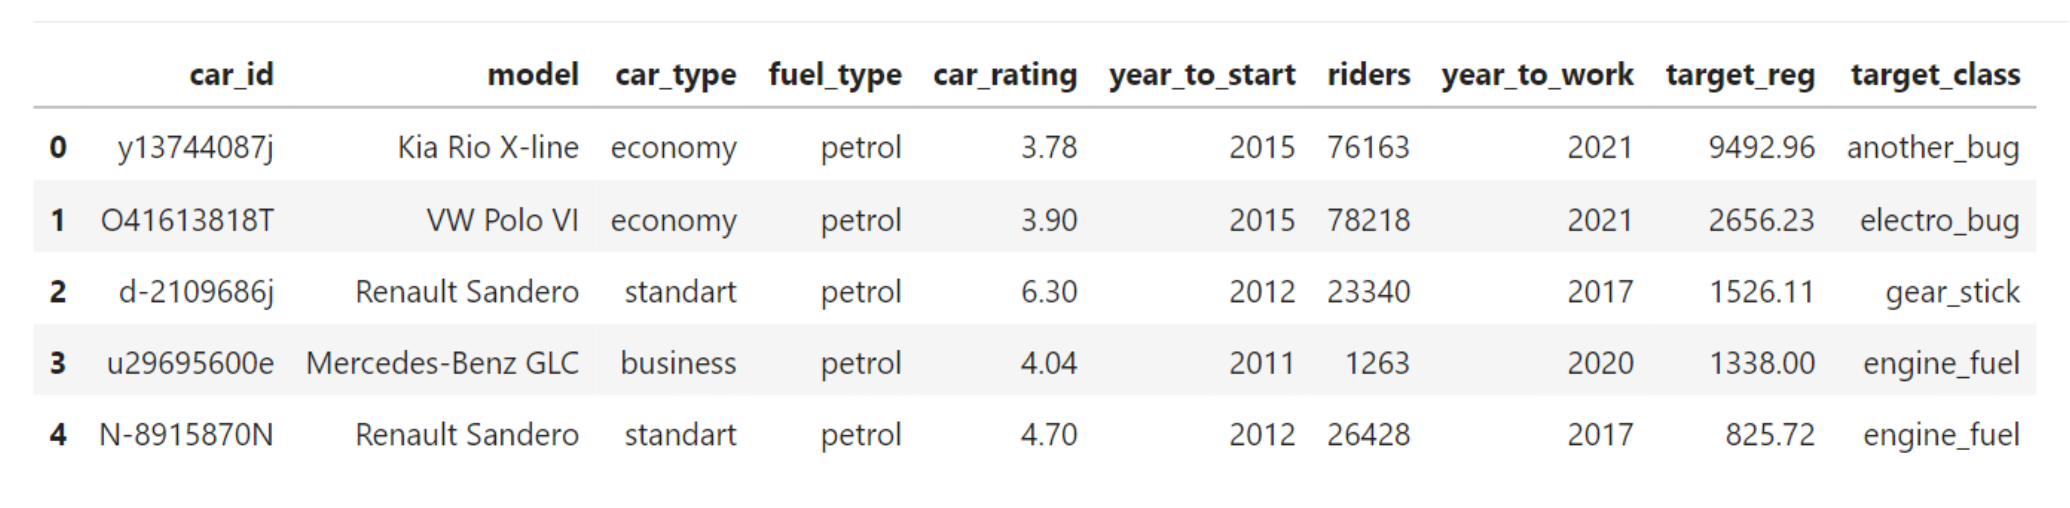

Задача:
- Отсортируйте строки сначала по убывания 1-го столбца из списка sort_by_list, затем по возрастанию 2-го столбца из списка.
- Удалите столбцы из списка cols2drop с учетом того, что некоторых столбцов может не быть в df.
- Сделайте порядок столбцов в df в соответствии с переменной columns_order_list: List[str].
- Удалите строки, в которых car_rating < critical_car_rating.
- Удалите строки, где число поездок riders больше 10_000, или тип машины car_type относится либо к standart, либо economy.


Судя по приведенному примеру мы рассматриваем датасет car_train. Импортируем датасет и посмотрим на выборку

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mihneh/project-carsharing/main/datasets/car_train.csv')
df = df.sample(10)
df

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
1157,Q13439225z,Kia Rio,economy,petrol,4.06,2012,23530,2020,25.46,engine_overheat
1410,L-8838271K,Kia Rio X-line,economy,petrol,4.88,2013,42058,2014,41.24,engine_fuel
790,M19182860m,Kia Sportage,standart,petrol,3.12,2011,3784,2019,30.60,break_bug
109,J-2221564E,Smart ForTwo,economy,petrol,5.62,2015,77620,2016,50.80,engine_ignition
1975,R-2948274o,VW Polo,economy,petrol,3.16,2012,19999,2016,30.17,break_bug
2099,C-1103176C,Smart Coupe,economy,petrol,4.74,2014,59095,2015,31.31,electro_bug
1158,h-1050982E,Smart Coupe,economy,petrol,5.52,2015,85398,2016,26.97,gear_stick
441,m17658099N,Hyundai Solaris,economy,petrol,4.02,2014,66759,2020,53.64,engine_check
643,m-4274263Z,Kia Sportage,standart,petrol,3.96,2013,46605,2018,38.49,engine_check
681,c21762167i,Smart ForFour,economy,petrol,3.48,2013,36104,2017,52.73,engine_check


Отсортируйте сперва по уменьшению 1-го столбца из списка sort_by_list и по увеличению 2-го столбца из списка.

In [ ]:
sort_by_list = ['model', 'year_to_start']
df.sort_values(by=sort_by_list[0], axis=0, ascending=False, inplace=True)
#df.sort_values(by='year_to_start', axis=0, ascending=True, inplace = True)
df

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
1975,R-2948274o,VW Polo,economy,petrol,3.16,2012,19999,2016,30.17,break_bug
109,J-2221564E,Smart ForTwo,economy,petrol,5.62,2015,77620,2016,50.80,engine_ignition
681,c21762167i,Smart ForFour,economy,petrol,3.48,2013,36104,2017,52.73,engine_check
2099,C-1103176C,Smart Coupe,economy,petrol,4.74,2014,59095,2015,31.31,electro_bug
1158,h-1050982E,Smart Coupe,economy,petrol,5.52,2015,85398,2016,26.97,gear_stick
790,M19182860m,Kia Sportage,standart,petrol,3.12,2011,3784,2019,30.60,break_bug
643,m-4274263Z,Kia Sportage,standart,petrol,3.96,2013,46605,2018,38.49,engine_check
1410,L-8838271K,Kia Rio X-line,economy,petrol,4.88,2013,42058,2014,41.24,engine_fuel
1157,Q13439225z,Kia Rio,economy,petrol,4.06,2012,23530,2020,25.46,engine_overheat
441,m17658099N,Hyundai Solaris,economy,petrol,4.02,2014,66759,2020,53.64,engine_check


Удалите столбцы из списка cols2drop с учетом того, что некоторых столбцов может не быть в df

In [ ]:
cols2drop = ['target_reg', 'target_class', 'takogo_stolbza_net']
df.drop(cols2drop, axis=1, inplace=True, errors='ignore')
df

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work
1975,R-2948274o,VW Polo,economy,petrol,3.16,2012,19999,2016
109,J-2221564E,Smart ForTwo,economy,petrol,5.62,2015,77620,2016
681,c21762167i,Smart ForFour,economy,petrol,3.48,2013,36104,2017
2099,C-1103176C,Smart Coupe,economy,petrol,4.74,2014,59095,2015
1158,h-1050982E,Smart Coupe,economy,petrol,5.52,2015,85398,2016
790,M19182860m,Kia Sportage,standart,petrol,3.12,2011,3784,2019
643,m-4274263Z,Kia Sportage,standart,petrol,3.96,2013,46605,2018
1410,L-8838271K,Kia Rio X-line,economy,petrol,4.88,2013,42058,2014
1157,Q13439225z,Kia Rio,economy,petrol,4.06,2012,23530,2020
441,m17658099N,Hyundai Solaris,economy,petrol,4.02,2014,66759,2020


Сделайте порядок столбцов в df в соответствии с переменной columns_order_list

In [ ]:
columns_order_list = ['year_to_work', 'riders', 'year_to_start', 'car_rating', 'fuel_type', 'model', 'car_id', 'car_type']
df=df.reindex(columns_order_list, axis=1)

In [ ]:
df

,year_to_work,riders,year_to_start,car_rating,fuel_type,model,car_id,car_type
1975,2016,19999,2012,3.16,petrol,VW Polo,R-2948274o,economy
109,2016,77620,2015,5.62,petrol,Smart ForTwo,J-2221564E,economy
681,2017,36104,2013,3.48,petrol,Smart ForFour,c21762167i,economy
2099,2015,59095,2014,4.74,petrol,Smart Coupe,C-1103176C,economy
1158,2016,85398,2015,5.52,petrol,Smart Coupe,h-1050982E,economy
790,2019,3784,2011,3.12,petrol,Kia Sportage,M19182860m,standart
643,2018,46605,2013,3.96,petrol,Kia Sportage,m-4274263Z,standart
1410,2014,42058,2013,4.88,petrol,Kia Rio X-line,L-8838271K,economy
1157,2020,23530,2012,4.06,petrol,Kia Rio,Q13439225z,economy
441,2020,66759,2014,4.02,petrol,Hyundai Solaris,m17658099N,economy


Удалите строки, в которых car_rating < critical_car_rating

In [ ]:
critical_car_rating = 4
df.query('car_rating >= @critical_car_rating', inplace=True)
df

,year_to_work,riders,year_to_start,car_rating,fuel_type,model,car_id,car_type
109,2016,77620,2015,5.62,petrol,Smart ForTwo,J-2221564E,economy
2099,2015,59095,2014,4.74,petrol,Smart Coupe,C-1103176C,economy
1158,2016,85398,2015,5.52,petrol,Smart Coupe,h-1050982E,economy
1410,2014,42058,2013,4.88,petrol,Kia Rio X-line,L-8838271K,economy
1157,2020,23530,2012,4.06,petrol,Kia Rio,Q13439225z,economy
441,2020,66759,2014,4.02,petrol,Hyundai Solaris,m17658099N,economy


Удалите строки, где число поездок (riders) больше 10_000 или тип машины (car_type) относится либо к standart, либо economy

In [ ]:
df.query('riders>24000 and ~car_type.isin(["standart"])')

,year_to_work,riders,year_to_start,car_rating,fuel_type,model,car_id,car_type
109,2016,77620,2015,5.62,petrol,Smart ForTwo,J-2221564E,economy
2099,2015,59095,2014,4.74,petrol,Smart Coupe,C-1103176C,economy
1158,2016,85398,2015,5.52,petrol,Smart Coupe,h-1050982E,economy
1410,2014,42058,2013,4.88,petrol,Kia Rio X-line,L-8838271K,economy
441,2020,66759,2014,4.02,petrol,Hyundai Solaris,m17658099N,economy


# Тренировочная задача 6 (функции)

Выполните по пунктам:
- Запишите в переменную mean_rating среднее по столбцу car_rating .
- Увеличьте на один все значения в столбцах car_rating и year_to_work.
- Отфильтруйте любым из удобных способов машины с рейтингом выше среднего от столбца car_rating (используйте переменную mean_rating).
- Преобразуйте столбец year_to_work следующим образом: если значение меньше 2017, то прибавьте 2, иначе разделите значение нацело на 5.
- Переименуйте столбец year_to_start в new_year_to_start и удалите столбец fuel_type.
- Ко всем значениям из столбца car_type добавьте приставку super_ (standart -> super_standart).

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mihneh/project-carsharing/main/datasets/car_train.csv')
df = df.sample(10)
df

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
954,m-1402552y,Renault Sandero,standart,petrol,5.10,2014,67311,2019,35.05,break_bug
86,A56074965v,Skoda Rapid,economy,petrol,3.48,2017,128159,2017,31.04,engine_fuel
500,U-1517611e,Smart Coupe,economy,petrol,5.30,2016,103648,2022,40.94,wheel_shake
429,c20826490j,Kia Rio X-line,economy,petrol,3.92,2011,1313,2019,31.70,electro_bug
1480,v-9816729Z,Renault Kaptur,standart,petrol,5.78,2013,52799,2015,58.45,another_bug
1059,p22438429U,Renault Sandero,standart,petrol,4.38,2011,3030,2016,35.91,engine_overheat
974,d-6273123g,Audi A4,premium,petrol,5.40,2014,70494,2018,76.10,another_bug
206,a-8546767B,VW Polo VI,economy,petrol,5.64,2012,20652,2014,53.85,engine_check
1887,P-2086663p,VW Polo,economy,petrol,4.26,2015,95986,2018,65.72,engine_ignition
811,y-2171969q,Renault Sandero,standart,petrol,4.08,2013,43899,2017,35.43,electro_bug


Запишите в переменную mean_rating среднее по столбцу car_rating

In [ ]:
mean_rating = df.car_rating.mean()
mean_rating

4.734

Увеличьте на один все значения в столбцах car_rating и year_to_work

In [ ]:
df.loc[:,['car_rating', 'year_to_work']] += 1
df

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
954,m-1402552y,Renault Sandero,standart,petrol,6.10,2014,67311,2020,35.05,break_bug
86,A56074965v,Skoda Rapid,economy,petrol,4.48,2017,128159,2018,31.04,engine_fuel
500,U-1517611e,Smart Coupe,economy,petrol,6.30,2016,103648,2023,40.94,wheel_shake
429,c20826490j,Kia Rio X-line,economy,petrol,4.92,2011,1313,2020,31.70,electro_bug
1480,v-9816729Z,Renault Kaptur,standart,petrol,6.78,2013,52799,2016,58.45,another_bug
1059,p22438429U,Renault Sandero,standart,petrol,5.38,2011,3030,2017,35.91,engine_overheat
974,d-6273123g,Audi A4,premium,petrol,6.40,2014,70494,2019,76.10,another_bug
206,a-8546767B,VW Polo VI,economy,petrol,6.64,2012,20652,2015,53.85,engine_check
1887,P-2086663p,VW Polo,economy,petrol,5.26,2015,95986,2019,65.72,engine_ignition
811,y-2171969q,Renault Sandero,standart,petrol,5.08,2013,43899,2018,35.43,electro_bug


Отфильтруйте одним из удобных способов машины с рейтингом выше среднего от столбца car_rating (переменная mean_rating)

In [ ]:
df.query('car_rating>@mean_rating', inplace = True)
df

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
954,m-1402552y,Renault Sandero,standart,petrol,6.10,2014,67311,2020,35.05,break_bug
500,U-1517611e,Smart Coupe,economy,petrol,6.30,2016,103648,2023,40.94,wheel_shake
429,c20826490j,Kia Rio X-line,economy,petrol,4.92,2011,1313,2020,31.70,electro_bug
1480,v-9816729Z,Renault Kaptur,standart,petrol,6.78,2013,52799,2016,58.45,another_bug
1059,p22438429U,Renault Sandero,standart,petrol,5.38,2011,3030,2017,35.91,engine_overheat
974,d-6273123g,Audi A4,premium,petrol,6.40,2014,70494,2019,76.10,another_bug
206,a-8546767B,VW Polo VI,economy,petrol,6.64,2012,20652,2015,53.85,engine_check
1887,P-2086663p,VW Polo,economy,petrol,5.26,2015,95986,2019,65.72,engine_ignition
811,y-2171969q,Renault Sandero,standart,petrol,5.08,2013,43899,2018,35.43,electro_bug


Преобразуйте столбец year_to_work следующим образом. Если значение меньше 2017, то прибавьте 2, иначе разделите значение на 5 (нацело!).

In [ ]:
df.year_to_work=df.year_to_work.apply(lambda x: (x+2) if x<2017 else x//5)
df

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
954,m-1402552y,Renault Sandero,standart,petrol,6.10,2014,67311,404,35.05,break_bug
500,U-1517611e,Smart Coupe,economy,petrol,6.30,2016,103648,404,40.94,wheel_shake
429,c20826490j,Kia Rio X-line,economy,petrol,4.92,2011,1313,404,31.70,electro_bug
1480,v-9816729Z,Renault Kaptur,standart,petrol,6.78,2013,52799,2018,58.45,another_bug
1059,p22438429U,Renault Sandero,standart,petrol,5.38,2011,3030,403,35.91,engine_overheat
974,d-6273123g,Audi A4,premium,petrol,6.40,2014,70494,403,76.10,another_bug
206,a-8546767B,VW Polo VI,economy,petrol,6.64,2012,20652,2017,53.85,engine_check
1887,P-2086663p,VW Polo,economy,petrol,5.26,2015,95986,403,65.72,engine_ignition
811,y-2171969q,Renault Sandero,standart,petrol,5.08,2013,43899,403,35.43,electro_bug


Переименуйте столбец year_to_start в new_year_to_start и удалите столбец fuel_type

In [ ]:
df.rename({'year_to_start':'new_year_to_start'}, axis=1, inplace=True)
df.drop('fuel_type', axis=1, inplace=True)
df

,car_id,model,car_type,car_rating,new_year_to_start,riders,year_to_work,target_reg,target_class
954,m-1402552y,Renault Sandero,standart,6.10,2014,67311,404,35.05,break_bug
500,U-1517611e,Smart Coupe,economy,6.30,2016,103648,404,40.94,wheel_shake
429,c20826490j,Kia Rio X-line,economy,4.92,2011,1313,404,31.70,electro_bug
1480,v-9816729Z,Renault Kaptur,standart,6.78,2013,52799,2018,58.45,another_bug
1059,p22438429U,Renault Sandero,standart,5.38,2011,3030,403,35.91,engine_overheat
974,d-6273123g,Audi A4,premium,6.40,2014,70494,403,76.10,another_bug
206,a-8546767B,VW Polo VI,economy,6.64,2012,20652,2017,53.85,engine_check
1887,P-2086663p,VW Polo,economy,5.26,2015,95986,403,65.72,engine_ignition
811,y-2171969q,Renault Sandero,standart,5.08,2013,43899,403,35.43,electro_bug


Ко всем значениям из столбца car_type добавьте приставку super_. (standart -> super_standart)

In [ ]:
df.car_type = 'super_'+df.car_type
result = df
result

,car_id,model,car_type,car_rating,new_year_to_start,riders,year_to_work,target_reg,target_class
954,m-1402552y,Renault Sandero,super_standart,6.10,2014,67311,404,35.05,break_bug
500,U-1517611e,Smart Coupe,super_economy,6.30,2016,103648,404,40.94,wheel_shake
429,c20826490j,Kia Rio X-line,super_economy,4.92,2011,1313,404,31.70,electro_bug
1480,v-9816729Z,Renault Kaptur,super_standart,6.78,2013,52799,2018,58.45,another_bug
1059,p22438429U,Renault Sandero,super_standart,5.38,2011,3030,403,35.91,engine_overheat
974,d-6273123g,Audi A4,super_premium,6.40,2014,70494,403,76.10,another_bug
206,a-8546767B,VW Polo VI,super_economy,6.64,2012,20652,2017,53.85,engine_check
1887,P-2086663p,VW Polo,super_economy,5.26,2015,95986,403,65.72,engine_ignition
811,y-2171969q,Renault Sandero,super_standart,5.08,2013,43899,403,35.43,electro_bug


# Тренировочная задача 7 (функции)

Объект pd.DataFrame() помещен в переменную df.

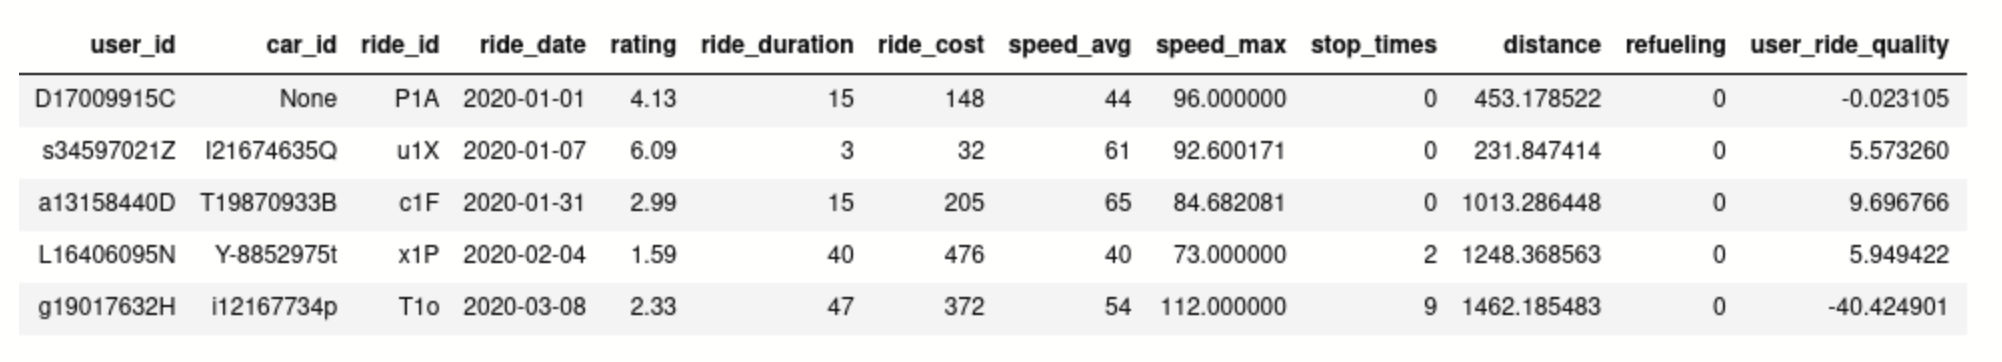

Задача:
- Добавьте столбец flag, который равен 'good_line', если rating > 5 and speed_max < 100. 'bad_line', если  rating > 5 and speed_max > 100. 'undefined' в остальных случаях.
- Добавьте столбец speed_check, который принимает значения 'avg_more', если distance/ride_duration > speed_avg, иначе 'avg_less'.
- Удалите столбцы из списка cols2drop.
- Удалите строки, в которых car_id имеет пустые значения (только NA удаляем).

Судя по картинке исопльзуется датасет с информацией о поездках. Импортируем его и посмотрим на данные.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mihneh/project-carsharing/main/datasets/rides_info.csv')
df.sample(10)

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
682312,w55108757W,w-1026142O,J1H,2020-02-01,5.85,24389,317052,35,75.000000,1,853940.694998,0,-13.003178,-6.921
160975,U22306237o,L12738838U,x1v,2020-01-14,3.54,20,253,40,58.000000,1,443.313014,0,6.340143,-26.961
295516,Q15210117F,U43132093r,S1L,2020-02-04,3.56,24,356,59,78.619171,0,1404.241753,0,-5.131204,-14.308
456025,U19529437m,g-1957069S,w1i,2020-03-17,6.94,7646,99392,52,63.000000,1,403974.304076,0,27.699567,16.316
218711,z12069262m,P10296494R,f1P,2020-03-29,4.51,45,625,54,82.000000,1,2149.055417,0,5.504631,12.494
117847,r18061653O,I-5434170l,f1e,2020-01-27,5.34,218,3483,38,60.000000,9,1007.043309,0,1.610188,4.317
592970,U12539689T,q-1248463u,j1N,2020-03-21,2.53,9,95,36,62.000000,1,56.669225,0,-23.140036,-23.569
389019,e38865278x,b11565616J,y1h,2020-03-09,4.83,126,1001,62,100.971232,1,3379.645699,0,-7.103706,15.424
584217,r10142459Z,p-7909067P,B1x,2020-02-22,1.00,28,358,34,163.139945,1,848.462220,0,1.785708,2.597
128590,v18219600T,J-1119809Z,h1X,2020-01-03,5.20,31,428,47,79.000000,0,1427.333204,0,-1.673405,-3.082


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739500 entries, 0 to 739499
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            739500 non-null  object 
 1   car_id             739500 non-null  object 
 2   ride_id            739500 non-null  object 
 3   ride_date          739500 non-null  object 
 4   rating             739500 non-null  float64
 5   ride_duration      739500 non-null  int64  
 6   ride_cost          739500 non-null  int64  
 7   speed_avg          739500 non-null  int64  
 8   speed_max          736139 non-null  float64
 9   stop_times         739500 non-null  int64  
 10  distance           739500 non-null  float64
 11  refueling          739500 non-null  int64  
 12  user_ride_quality  736872 non-null  float64
 13  deviation_normal   739500 non-null  float64
dtypes: float64(5), int64(5), object(4)
memory usage: 79.0+ MB


In [ ]:
df.describe()

,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
count,739500.000000,739500.000000,7.395000e+05,739500.000000,736139.000000,739500.000000,7.395000e+05,739500.000000,736872.000000,739500.000000
mean,4.471255,1669.619079,2.093108e+04,47.012270,83.787431,1.337385,7.839567e+04,0.000004,-0.273648,-1.341434
std,2.130867,6356.635586,8.731537e+04,12.690333,29.642707,2.369775,3.158147e+05,0.002014,11.657122,19.581792
min,0.000000,2.000000,7.000000e+00,25.000000,27.900000,0.000000,1.843634e+00,0.000000,-65.776864,-126.883000
25%,3.120000,27.000000,2.980000e+02,38.000000,64.000000,0.000000,7.925952e+02,0.000000,-6.975054,-9.358000
50%,4.470000,44.000000,5.050000e+02,46.000000,75.275957,1.000000,1.452544e+03,0.000000,0.074098,0.000000
75%,5.830000,69.000000,8.880000e+02,52.000000,97.000000,2.000000,2.247795e+03,0.000000,6.461507,7.539250
max,10.000000,43956.000000,2.007346e+06,100.000000,209.982840,23.000000,3.606051e+06,1.000000,69.574650,98.743000


Добавьте столбец flag, который равен 'good_line' если rating > 5 and speed_max < 100, 'bad_line' если  rating > 5 and speed_max > 100, 'undefined' в остальных случаях.

In [ ]:
df['flag'] = 'undefine'
df.loc[(df.rating > 5) & (df.speed_max < 100), 'flag'] = 'good_line'
df.loc[(df.rating > 5) & (df.speed_max > 100), 'flag'] = 'bad_line'
df

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal,flag
0,o52317055h,A-1049127W,b1v,2020-01-01,4.95,21,268,36,113.548538,0,514.246920,0,1.115260,2.909,undefine
1,H41298704y,A-1049127W,T1U,2020-01-01,6.91,8,59,36,93.000000,1,197.520662,0,1.650465,4.133,good_line
2,v88009926E,A-1049127W,g1p,2020-01-02,6.01,20,315,61,81.959675,0,1276.328206,0,2.599112,2.461,good_line
3,t14229455i,A-1049127W,S1c,2020-01-02,0.26,19,205,32,128.000000,0,535.680831,0,3.216255,0.909,undefine
4,W17067612E,A-1049127W,X1b,2020-01-03,1.21,56,554,38,90.000000,1,1729.143367,0,2.716550,-1.822,undefine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739495,I15732675M,z91796444U,m1z,2020-03-30,7.42,164,2290,49,54.586302,0,2274.772387,0,6.137593,-39.752,good_line
739496,r51579957X,z91796444U,t1P,2020-03-30,4.19,26,412,46,73.000000,0,515.580231,0,6.703367,-38.480,undefine
739497,l15212727I,z91796444U,z1A,2020-03-31,3.40,23,178,37,71.000000,1,444.846677,0,6.255344,-45.080,undefine
739498,Z78949958q,z91796444U,w1R,2020-04-01,9.02,5,75,48,87.000000,1,179.464361,0,7.759949,-60.193,good_line


Добавьте столбец speed_check, который принимает значения 'avg_more' если distance/ride_duration > speed_avg, иначе 'avg_less'

In [ ]:
df['speed_check'] = 'avg_less'
df.loc[df.distance/df.ride_duration > df.speed_avg, 'speed_check'] = 'ave_more'
df

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal,flag,speed_check
0,o52317055h,A-1049127W,b1v,2020-01-01,4.95,21,268,36,113.548538,0,514.246920,0,1.115260,2.909,undefine,avg_less
1,H41298704y,A-1049127W,T1U,2020-01-01,6.91,8,59,36,93.000000,1,197.520662,0,1.650465,4.133,good_line,avg_less
2,v88009926E,A-1049127W,g1p,2020-01-02,6.01,20,315,61,81.959675,0,1276.328206,0,2.599112,2.461,good_line,ave_more
3,t14229455i,A-1049127W,S1c,2020-01-02,0.26,19,205,32,128.000000,0,535.680831,0,3.216255,0.909,undefine,avg_less
4,W17067612E,A-1049127W,X1b,2020-01-03,1.21,56,554,38,90.000000,1,1729.143367,0,2.716550,-1.822,undefine,avg_less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739495,I15732675M,z91796444U,m1z,2020-03-30,7.42,164,2290,49,54.586302,0,2274.772387,0,6.137593,-39.752,good_line,avg_less
739496,r51579957X,z91796444U,t1P,2020-03-30,4.19,26,412,46,73.000000,0,515.580231,0,6.703367,-38.480,undefine,avg_less
739497,l15212727I,z91796444U,z1A,2020-03-31,3.40,23,178,37,71.000000,1,444.846677,0,6.255344,-45.080,undefine,avg_less
739498,Z78949958q,z91796444U,w1R,2020-04-01,9.02,5,75,48,87.000000,1,179.464361,0,7.759949,-60.193,good_line,avg_less


Удалите столбцы из списка cols2drop.

In [ ]:
cols2drop=['user_id','ride_id']
df.drop(cols2drop,axis=1,inplace=True)
df

,car_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal,flag,speed_check
0,A-1049127W,2020-01-01,4.95,21,268,36,113.548538,0,514.246920,0,1.115260,2.909,undefine,avg_less
1,A-1049127W,2020-01-01,6.91,8,59,36,93.000000,1,197.520662,0,1.650465,4.133,good_line,avg_less
2,A-1049127W,2020-01-02,6.01,20,315,61,81.959675,0,1276.328206,0,2.599112,2.461,good_line,ave_more
3,A-1049127W,2020-01-02,0.26,19,205,32,128.000000,0,535.680831,0,3.216255,0.909,undefine,avg_less
4,A-1049127W,2020-01-03,1.21,56,554,38,90.000000,1,1729.143367,0,2.716550,-1.822,undefine,avg_less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739495,z91796444U,2020-03-30,7.42,164,2290,49,54.586302,0,2274.772387,0,6.137593,-39.752,good_line,avg_less
739496,z91796444U,2020-03-30,4.19,26,412,46,73.000000,0,515.580231,0,6.703367,-38.480,undefine,avg_less
739497,z91796444U,2020-03-31,3.40,23,178,37,71.000000,1,444.846677,0,6.255344,-45.080,undefine,avg_less
739498,z91796444U,2020-04-01,9.02,5,75,48,87.000000,1,179.464361,0,7.759949,-60.193,good_line,avg_less


Удалите строки, в которых car_id имеет пустые значения (только NA удаляем).

In [ ]:
df.dropna(subset='car_id', inplace=True)
result = df
result

,car_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal,flag,speed_check
0,A-1049127W,2020-01-01,4.95,21,268,36,113.548538,0,514.246920,0,1.115260,2.909,undefine,avg_less
1,A-1049127W,2020-01-01,6.91,8,59,36,93.000000,1,197.520662,0,1.650465,4.133,good_line,avg_less
2,A-1049127W,2020-01-02,6.01,20,315,61,81.959675,0,1276.328206,0,2.599112,2.461,good_line,ave_more
3,A-1049127W,2020-01-02,0.26,19,205,32,128.000000,0,535.680831,0,3.216255,0.909,undefine,avg_less
4,A-1049127W,2020-01-03,1.21,56,554,38,90.000000,1,1729.143367,0,2.716550,-1.822,undefine,avg_less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739495,z91796444U,2020-03-30,7.42,164,2290,49,54.586302,0,2274.772387,0,6.137593,-39.752,good_line,avg_less
739496,z91796444U,2020-03-30,4.19,26,412,46,73.000000,0,515.580231,0,6.703367,-38.480,undefine,avg_less
739497,z91796444U,2020-03-31,3.40,23,178,37,71.000000,1,444.846677,0,6.255344,-45.080,undefine,avg_less
739498,z91796444U,2020-04-01,9.02,5,75,48,87.000000,1,179.464361,0,7.759949,-60.193,good_line,avg_less


# Тренировочная задача 8 (редактирование и заполнение таблиц)

Объект pd.DataFrame() помещен в переменную df.

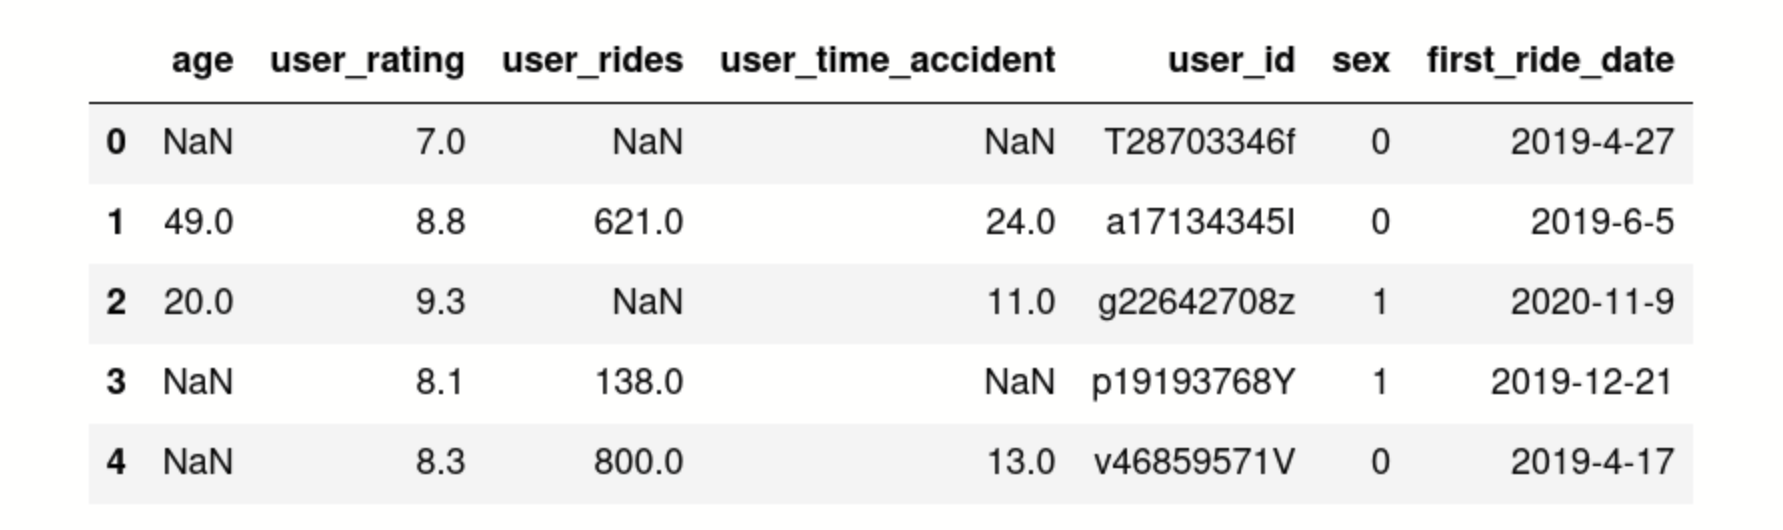

Задача:
- Посчитайте количество пропусков в каждой строке и запишите это в новый столбец nans_num.
- Удалите строки, где количество пропусков больше 2.
- Удалите строки, где age имеет пропущенные значения.
- Заполните пропущенные значения в столбце user_time_accident медианным значением.
- Оставьте только столбцы age, user_rides, user_time_accident.

In [ ]:
import pandas as pd

Начнем опять с рассмотрения таблицы. Она похожа на объект из таблицы driver_info.csv. Импортируем и проверим

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mihneh/project-carsharing/main/datasets/driver_info.csv')
df

,age,user_rating,user_rides,user_time_accident,user_id,sex,first_ride_date
0,27,9.0,865,19.0,l17437965W,1,2019-4-2
1,46,7.9,2116,11.0,Z12362316j,0,2021-11-19
2,59,7.8,947,4.0,g11098715c,0,2021-1-15
3,37,7.0,18,4.0,U12618125q,0,2019-11-20
4,39,8.2,428,7.0,A14375829B,0,2019-7-23
...,...,...,...,...,...,...,...
15148,19,7.9,52,12.0,R13807707w,1,2019-12-1
15149,40,7.6,1142,3.0,F86199947G,0,2019-1-18
15150,27,7.9,1280,3.0,O10119419p,1,2018-9-16
15151,30,7.9,31,5.0,B35483077Y,0,2019-11-23


In [ ]:
df.describe()

,age,user_rating,user_rides,user_time_accident,sex
count,15153.000000,15153.000000,15153.000000,14182.000000,15153.000000
mean,33.581073,8.109345,871.015442,10.129601,0.499967
std,9.919271,0.668246,573.512378,8.867482,0.500016
min,18.000000,5.800000,0.000000,0.000000,0.000000
25%,25.000000,7.700000,421.000000,4.000000,0.000000
50%,33.000000,8.100000,876.000000,9.000000,0.000000
75%,41.000000,8.600000,1145.000000,14.000000,1.000000
max,63.000000,10.000000,3316.000000,86.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15153 entries, 0 to 15152
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 15153 non-null  int64  
 1   user_rating         15153 non-null  float64
 2   user_rides          15153 non-null  int64  
 3   user_time_accident  14182 non-null  float64
 4   user_id             15153 non-null  object 
 5   sex                 15153 non-null  int64  
 6   first_ride_date     15153 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 828.8+ KB


Посчитайте количество пропусков в каждой строке и запишите это в новый столбец nans_num

In [ ]:
df['nans_num']=df.isna().sum(axis=1)
df

,age,user_rating,user_rides,user_time_accident,user_id,sex,first_ride_date,nans_num
0,27,9.0,865,19.0,l17437965W,1,2019-4-2,0
1,46,7.9,2116,11.0,Z12362316j,0,2021-11-19,0
2,59,7.8,947,4.0,g11098715c,0,2021-1-15,0
3,37,7.0,18,4.0,U12618125q,0,2019-11-20,0
4,39,8.2,428,7.0,A14375829B,0,2019-7-23,0
...,...,...,...,...,...,...,...,...
15148,19,7.9,52,12.0,R13807707w,1,2019-12-1,0
15149,40,7.6,1142,3.0,F86199947G,0,2019-1-18,0
15150,27,7.9,1280,3.0,O10119419p,1,2018-9-16,0
15151,30,7.9,31,5.0,B35483077Y,0,2019-11-23,0


Удалите строки, где количество пропусков больше 2

In [ ]:
df.query('nans_num<3')

,age,user_rating,user_rides,user_time_accident,user_id,sex,first_ride_date,nans_num
0,27,9.0,865,19.0,l17437965W,1,2019-4-2,0
1,46,7.9,2116,11.0,Z12362316j,0,2021-11-19,0
2,59,7.8,947,4.0,g11098715c,0,2021-1-15,0
3,37,7.0,18,4.0,U12618125q,0,2019-11-20,0
4,39,8.2,428,7.0,A14375829B,0,2019-7-23,0
...,...,...,...,...,...,...,...,...
15148,19,7.9,52,12.0,R13807707w,1,2019-12-1,0
15149,40,7.6,1142,3.0,F86199947G,0,2019-1-18,0
15150,27,7.9,1280,3.0,O10119419p,1,2018-9-16,0
15151,30,7.9,31,5.0,B35483077Y,0,2019-11-23,0


Удалите строки, где age имеет пропущенные значения.

In [ ]:
df.dropna(axis=0, subset=['age'], inplace=True)
df

,age,user_rating,user_rides,user_time_accident,user_id,sex,first_ride_date,nans_num
0,27,9.0,865,19.0,l17437965W,1,2019-4-2,0
1,46,7.9,2116,11.0,Z12362316j,0,2021-11-19,0
2,59,7.8,947,4.0,g11098715c,0,2021-1-15,0
3,37,7.0,18,4.0,U12618125q,0,2019-11-20,0
4,39,8.2,428,7.0,A14375829B,0,2019-7-23,0
...,...,...,...,...,...,...,...,...
15148,19,7.9,52,12.0,R13807707w,1,2019-12-1,0
15149,40,7.6,1142,3.0,F86199947G,0,2019-1-18,0
15150,27,7.9,1280,3.0,O10119419p,1,2018-9-16,0
15151,30,7.9,31,5.0,B35483077Y,0,2019-11-23,0


Заполните пропущенные значения в столбце user_time_accident медианным значением

In [ ]:
df.user_time_accident.fillna(df.user_time_accident.median(), inplace=True)
df


,age,user_rating,user_rides,user_time_accident,user_id,sex,first_ride_date,nans_num
0,27,9.0,865,19.0,l17437965W,1,2019-4-2,0
1,46,7.9,2116,11.0,Z12362316j,0,2021-11-19,0
2,59,7.8,947,4.0,g11098715c,0,2021-1-15,0
3,37,7.0,18,4.0,U12618125q,0,2019-11-20,0
4,39,8.2,428,7.0,A14375829B,0,2019-7-23,0
...,...,...,...,...,...,...,...,...
15148,19,7.9,52,12.0,R13807707w,1,2019-12-1,0
15149,40,7.6,1142,3.0,F86199947G,0,2019-1-18,0
15150,27,7.9,1280,3.0,O10119419p,1,2018-9-16,0
15151,30,7.9,31,5.0,B35483077Y,0,2019-11-23,0


In [ ]:
df.isna().value_counts()

age    user_rating  user_rides  user_time_accident  user_id  sex    first_ride_date  nans_num
False  False        False       False               False    False  False            False       15153
dtype: int64

Оставьте только столбцы age, user_rides, user_time_accident

In [ ]:
result=df.filter(['age', 'user_rides', 'user_time_accident'], axis=1)
result

,age,user_rides,user_time_accident
0,27,865,19.0
1,46,2116,11.0
2,59,947,4.0
3,37,18,4.0
4,39,428,7.0
...,...,...,...
15148,19,52,12.0
15149,40,1142,3.0
15150,27,1280,3.0
15151,30,31,5.0
